# Predicting heart disease using machine learning 

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to
build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes. 

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling 
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleaveland data from the UCI Machine Learning Repositiory.

There is also a version available on Kaggle.

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data.

id (Unique id for each patient)
age (Age of the patient in years)
origin (place of study)
sex (Male/Female)
cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
chol (serum cholesterol in mg/dl)
fbs (if fasting blood sugar > 120 mg/dl)
restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
thalach: maximum heart rate achieved
exang: exercise-induced angina (True/ False)
oldpeak: ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
ca: number of major vessels (0-3) colored by fluoroscopy
thal: [normal; fixed defect; reversible defect]
num: the predicted attribute

## Preparing the tools 

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation

In [1]:
# Import all the tools we need 


# Regular EDA(exploratory data analysis) and plotting libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

%matplotlib inline 
# we want our plots to appear inside the notebook

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

## Load data 

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape # (rows,columns)

(1025, 15)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject metter expert on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data

In [3]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

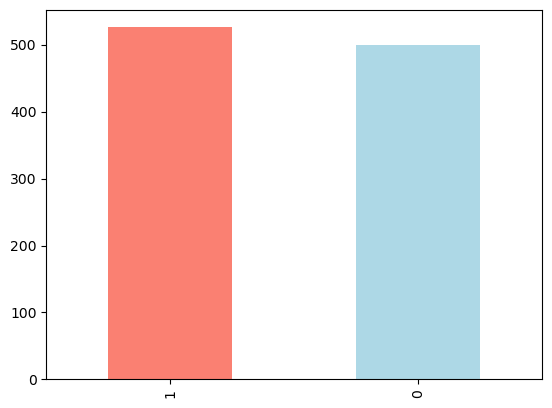

In [6]:
df["target"].value_counts().plot(kind = "bar",color = ["salmon","lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1025 non-null   int64  
 1   age         1025 non-null   int64  
 2   sex         1025 non-null   int64  
 3   cp          1025 non-null   int64  
 4   trestbps    1025 non-null   int64  
 5   chol        1025 non-null   int64  
 6   fbs         1025 non-null   int64  
 7   restecg     1025 non-null   int64  
 8   thalach     1025 non-null   int64  
 9   exang       1025 non-null   int64  
 10  oldpeak     1025 non-null   float64
 11  slope       1025 non-null   int64  
 12  ca          1025 non-null   int64  
 13  thal        1025 non-null   int64  
 14  target      1025 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 120.2 KB


In [8]:
# are there any missing values
df.isna().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [9]:
df.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,512.000000,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,296.036315,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,0.000000,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,256.000000,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,512.000000,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,768.000000,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,1024.000000,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to gender

In [10]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [11]:
# Compare taret column with sex column 
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,86,413
1,226,300


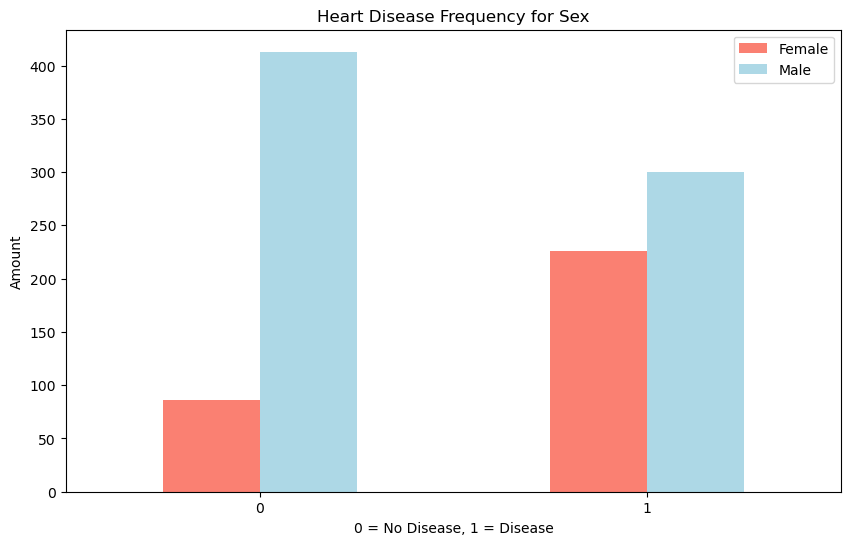

In [12]:
# Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation = 0);

In [13]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [14]:
df["thalach"].value_counts()

162    35
160    31
163    29
173    28
152    28
       ..
194     3
185     3
106     3
88      3
113     3
Name: thalach, Length: 91, dtype: int64

### Age vs Max Heart Rate for Heart Disease

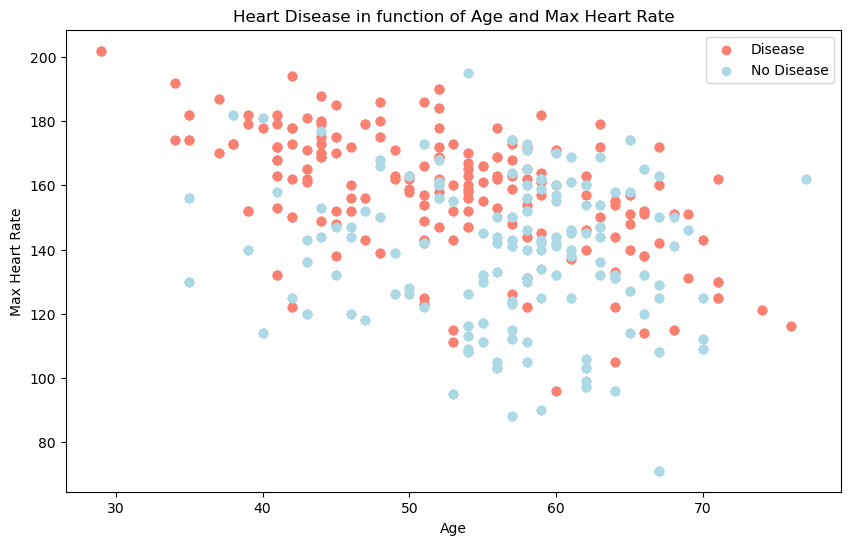

In [15]:
# Create another figure
plt.figure(figsize =(10,6))
#Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

#Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");
# Add some helpful info 
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

In [16]:
df.age[df.target==1]

5       58
10      71
12      34
15      34
16      51
        ..
1011    45
1014    44
1019    47
1020    59
1023    50
Name: age, Length: 526, dtype: int64

<AxesSubplot:ylabel='Frequency'>

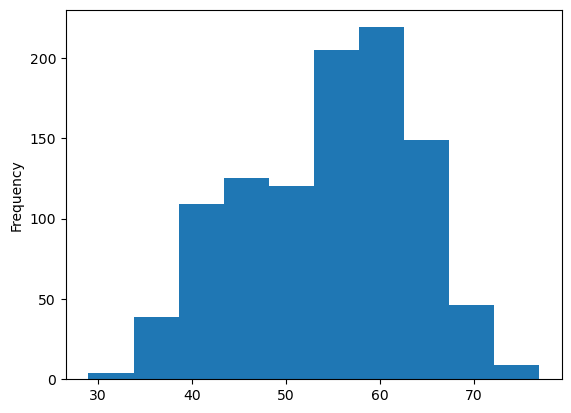

In [17]:
# Check the distribution of the age cloumn with a histogram
df.age.plot.hist()

### Heart Disease Frequency per chest pain types 


In [18]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


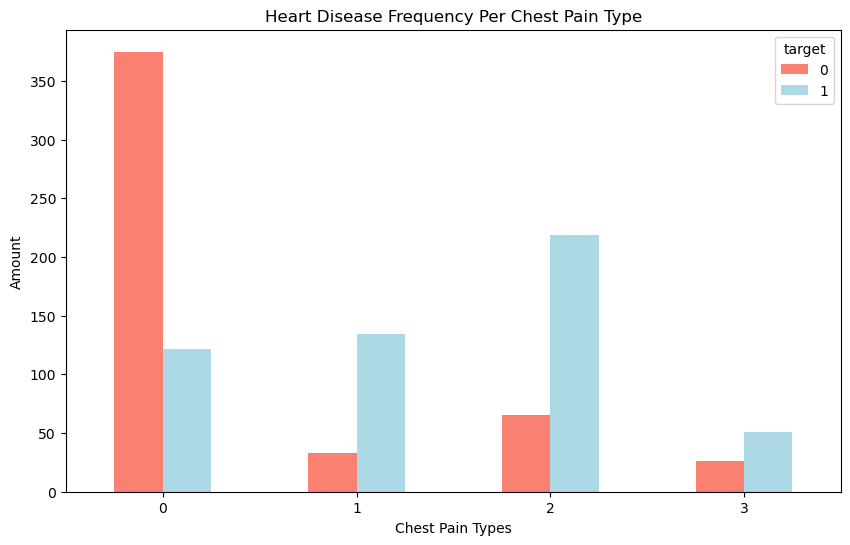

In [19]:
# Make the crosstab more visual 
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.ylabel("Amount")
plt.xlabel("Chest Pain Types")
plt.xticks(rotation=0);

In [20]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [21]:
# Make a correlation matrix
df.corr()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Unnamed: 0,1.000000,0.045194,-0.002494,-0.047583,-0.037871,-0.031505,-0.030931,0.081995,-0.037926,-0.008485,0.002616,-0.025173,0.004608,0.055929,-0.025146
age,0.045194,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.002494,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.047583,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,-0.037871,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,-0.031505,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,-0.030931,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,0.081995,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.037926,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,-0.008485,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029


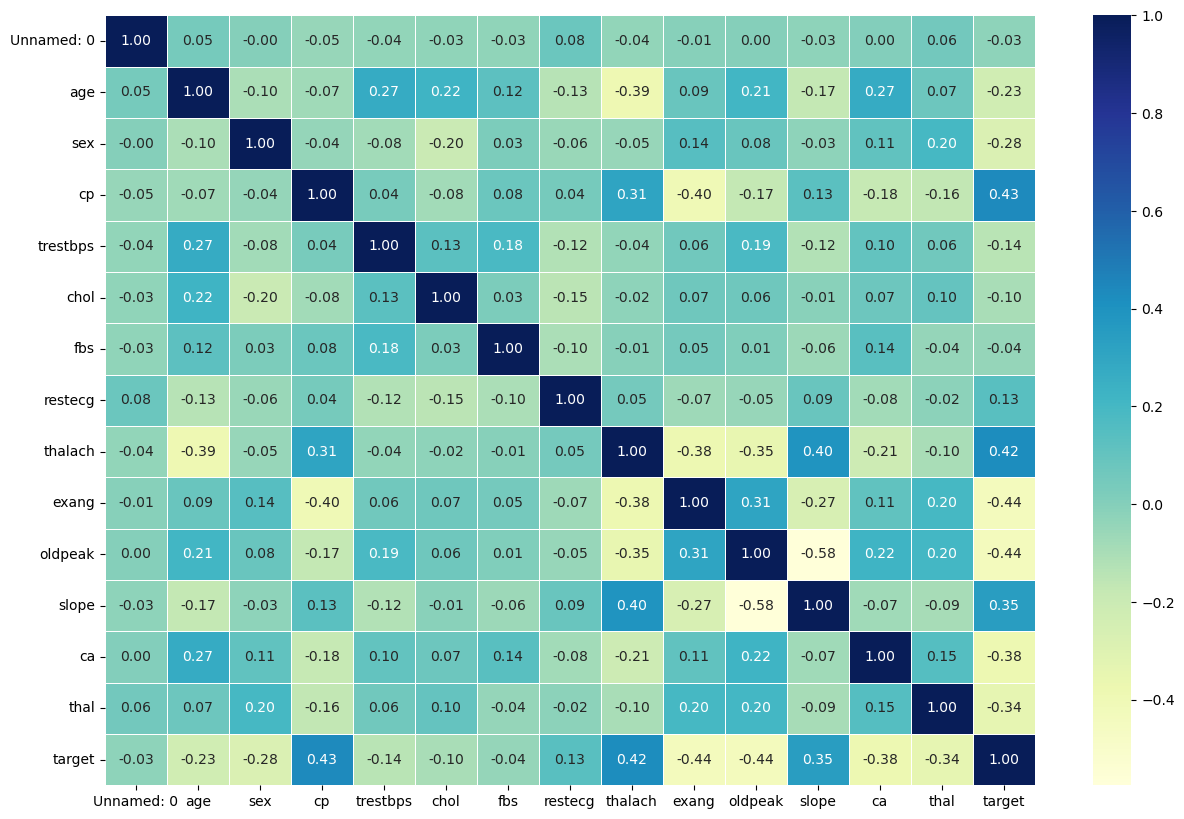

In [22]:
# Lets make our correlation matrix a little prettier
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt = ".2f",
                 cmap="YlGnBu");

In [23]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## 5.0 Modelling

In [24]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [25]:
# Split the data into x and y 
X = df.drop("target",axis = 1)
y = df["target"]


In [26]:
X

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [27]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [28]:
# Split data into train and test sets 
np.random.seed(42)

# Split into train and test sets 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [29]:
X_train

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [30]:
y_test

527    1
359    1
447    0
31     1
621    0
      ..
832    1
796    1
644    1
404    0
842    0
Name: target, Length: 205, dtype: int64

In [31]:
len(y_train)

820

Now we've got our data into training and test sets, it's time to using our model

we'll train it (find the patters) in training data 

And we'll test it(use the patters) on the test data

We're going to try three different machine learning models:
1. Logistic Regression 
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [32]:
# Put models in a dictionary
models = {"Logistic Regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier()}
# Create a function to fit and score models 
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : traingin data ( no labels )
    X_test : testing data ( no labels )
    y_train : training labels
    y_test  : test labels
    """
    # Set random seed 
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # loop through models
    for name, model in models.items():
        # Fit the model to the data 
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [33]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

C:\Users\KIIT\Desktop\Work\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8,
 'KNN': 0.5853658536585366,
 'Random Forest': 0.9804878048780488}

### Model Comparision

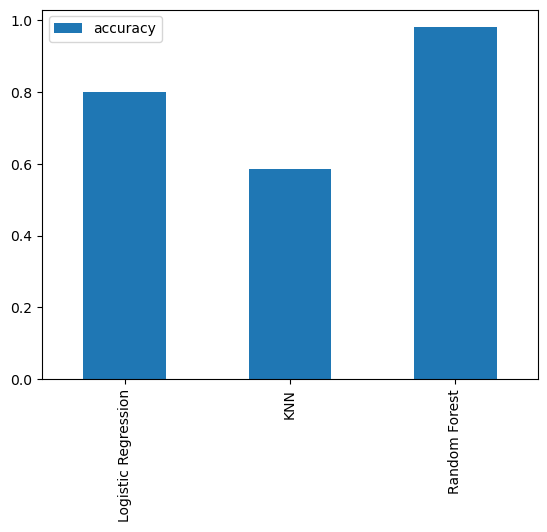

In [34]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar();

Now we have got a baseline model 
let's look at the following:
* Hyperparameter tuning 
* Feature importances 
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report 
* ROC curve
* Area under the curve(AUC)

### Hyperparameter tuning 

In [35]:
# Let's tune KNN
train_scores = []
test_scores = []

# Create a list of different values of n_neighbors
neighbors = range(1,21)

# Setup KNN instance 
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    #Fit the algorithm
    knn.fit(X_train,y_train)
    
    #Update the training scores list 
    train_scores.append(knn.score(X_train,y_train))
    
    #Update the test scores list 
    test_scores.append(knn.score(X_test, y_test))

In [36]:
train_scores

[1.0,
 0.8085365853658537,
 0.8073170731707318,
 0.7658536585365854,
 0.7682926829268293,
 0.7414634146341463,
 0.7353658536585366,
 0.7329268292682927,
 0.7329268292682927,
 0.7170731707317073,
 0.724390243902439,
 0.7048780487804878,
 0.7121951219512195,
 0.7170731707317073,
 0.7121951219512195,
 0.7085365853658536,
 0.698780487804878,
 0.6939024390243902,
 0.6926829268292682,
 0.6902439024390243]

In [37]:
test_scores

[0.6048780487804878,
 0.5707317073170731,
 0.5707317073170731,
 0.5609756097560976,
 0.5853658536585366,
 0.5609756097560976,
 0.5658536585365853,
 0.5658536585365853,
 0.5902439024390244,
 0.5707317073170731,
 0.5756097560975609,
 0.5609756097560976,
 0.5609756097560976,
 0.5853658536585366,
 0.5658536585365853,
 0.5756097560975609,
 0.5707317073170731,
 0.5707317073170731,
 0.5804878048780487,
 0.5756097560975609]

Maximum KNN score on the test data: 60.49%


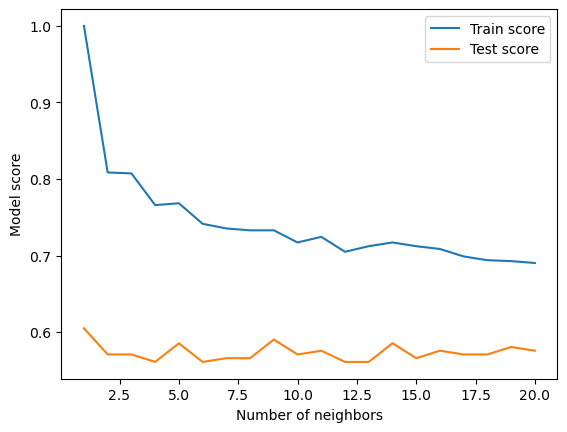

In [38]:
plt.plot(neighbors, train_scores, label = "Train score")
plt.plot(neighbors, test_scores, label = "Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV 
We're going to use:
* LogisticRegression()
* RandomForestClassifier()
... using RandomizedSearchCV


In [39]:
# Create a Hyperparameter grid for LogisticRegression 
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth": [None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}

In [40]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

Now we have got hyperparameters gird set up for each of our models ,let's tune them 
using randomizedsearchcv

In [41]:
# Tune Logistic Regression 
np.random.seed(42)

# Setup Random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [42]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [43]:
rs_log_reg.score(X_test,y_test)

0.7853658536585366

Now we have tune logistic regression(), lets do the same for randomforst classifier


In [44]:
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)

# FFit random hyper parameter search model for RandomForestClassifier()
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [45]:
# Find the best hyperparameters 
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [46]:
# Evaluate the randomized serach RandomForestClassifier model
rs_rf.score(X_test,y_test)

0.9121951219512195

In [47]:
model_scores

{'Logistic Regression': 0.8,
 'KNN': 0.5853658536585366,
 'Random Forest': 0.9804878048780488}

## Hyperparameter tuning using GridSearchCV
Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV..

In [48]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4,4,30),
                "solver": ["liblinear"]}

#Setup grid hyperparameter search for logistic regression 
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv = 5,
                         verbose = True)
#Fit grid hyperparameter search model 
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [49]:
# Check the best hyperparameters

gs_log_reg.best_params_

{'C': 2.592943797404667, 'solver': 'liblinear'}

In [50]:
# Evaluate the grid search LogisticRegresion model 
gs_log_reg.score(X_test,y_test)

0.7902439024390244

 ## Evaluating our tuned machine learning classifier, beyong accuracy 
    * ROC curve and AUC score
    * Confusion matrix
    * Classification report 
    * Precision 
    * Recall
    * F1-score
... and it would be great if corsss-validation was used where possible 
to make dcomparisoinoos and evaluate our trainecd model, first we need to make predictions 


In [51]:
# Make predictions with tuned model 
y_preds = gs_log_reg.predict(X_test)

In [52]:
y_preds

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [53]:
y_test

527    1
359    1
447    0
31     1
621    0
      ..
832    1
796    1
644    1
404    0
842    0
Name: target, Length: 205, dtype: int64

C:\Users\KIIT\Desktop\Work\heart-disease-project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


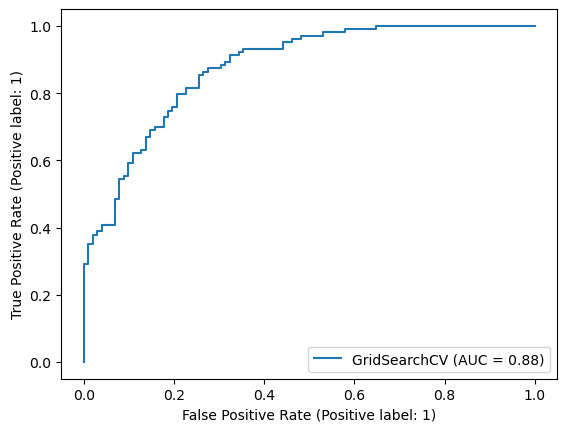

In [54]:
#import roc curve functions from sklearn.metrics module
#Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg,X_test,y_test)

In [55]:
# Confusion matrix 
print(confusion_matrix(y_test,y_preds))

[[72 30]
 [13 90]]


In [56]:
sns

<module 'seaborn' from 'C:\\Users\\KIIT\\Desktop\\Work\\heart-disease-project\\env\\lib\\site-packages\\seaborn\\__init__.py'>

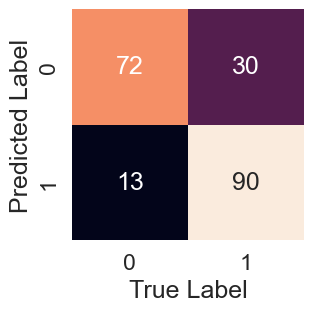

In [57]:
sns.set(font_scale = 1.5)
def plot_conf_matrix(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's
    heartmap()
    """
    fig,ax  = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
   
plot_conf_matrix(y_test,y_preds)

Now we've got a roc curve and auc metric and a confusion metric 
let get a classification report as well as cross validdated precision recall and f1-score


In [58]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77       102
           1       0.75      0.87      0.81       103

    accuracy                           0.79       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.79      0.79       205



In [59]:
# A model which does not produce false positive will have a recall 1
# A model which produces no false negatives has a recall of 1 
# will be a high value if one class supports another 
# recalculate the metrics using cross validation 

### Calculate evaluation metrics using cross validation 

We're giong to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we will be using `cross_val_score`

In [60]:
# Check best hyperparameters 
gs_log_reg.best_params_

{'C': 2.592943797404667, 'solver': 'liblinear'}

In [61]:
# Create a new classifier with best parameters 
clf = LogisticRegression(C=2.592943797404667,
                         solver="liblinear")

In [62]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv = 5,
                         scoring = 'accuracy')
cv_acc

array([0.88292683, 0.85365854, 0.87804878, 0.8195122 , 0.81463415])

In [63]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8497560975609757

In [64]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv = 5,
                         scoring = 'precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.826519193131108

In [65]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv = 5,
                         scoring = 'recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.8955256064690026

In [66]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv = 5,
                         scoring = 'f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8595267483523867

<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

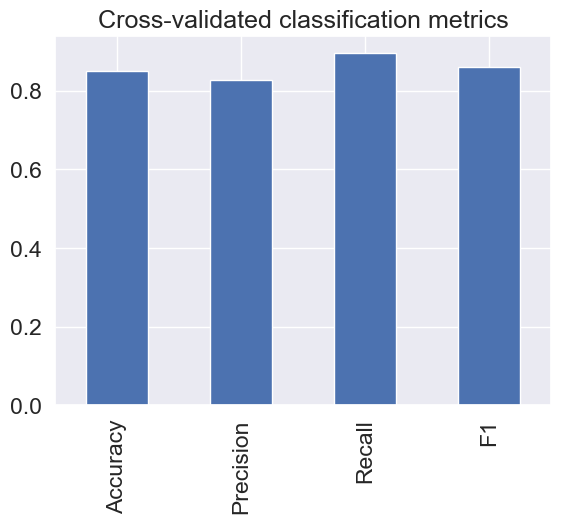

In [67]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision":cv_precision,
                           "Recall":cv_recall,
                           "F1":cv_f1},
                         index = [0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend = False)

### Feature Importance 

is another way of asking "which features contributed most to the outcome sof the model and how did they contribute?"

Finding feature importance is different for each machine learning model 

Let's find the feature importance for our Logistic Regression model ...


In [68]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [69]:
# Fit an instance of LogisticRegression 
gs_log_reg.best_params_

clf = LogisticRegression(C= 2.592943797404667, solver= 'liblinear')
clf.fit(X_train,y_train);

In [71]:
# Check coef_
clf.coef_

array([[ 2.51468045e-04,  9.66400197e-03, -1.73473941e+00,
         8.63007510e-01, -1.61649783e-02, -8.52472835e-03,
        -1.97493882e-01,  2.93233054e-01,  3.35923462e-02,
        -8.19871184e-01, -6.58705707e-01,  5.76946946e-01,
        -8.18731268e-01, -1.06699182e+00]])

In [72]:
# Match coef's of features to columns 
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))

In [73]:
feature_dict

{'Unnamed: 0': 0.00025146804547643563,
 'age': 0.009664001970991353,
 'sex': -1.7347394105677085,
 'cp': 0.8630075096583849,
 'trestbps': -0.01616497826951171,
 'chol': -0.008524728345605298,
 'fbs': -0.1974938824893939,
 'restecg': 0.2932330544961599,
 'thalach': 0.03359234624929796,
 'exang': -0.8198711843701206,
 'oldpeak': -0.6587057069885828,
 'slope': 0.5769469462412884,
 'ca': -0.8187312684551952,
 'thal': -1.0669918212268616}

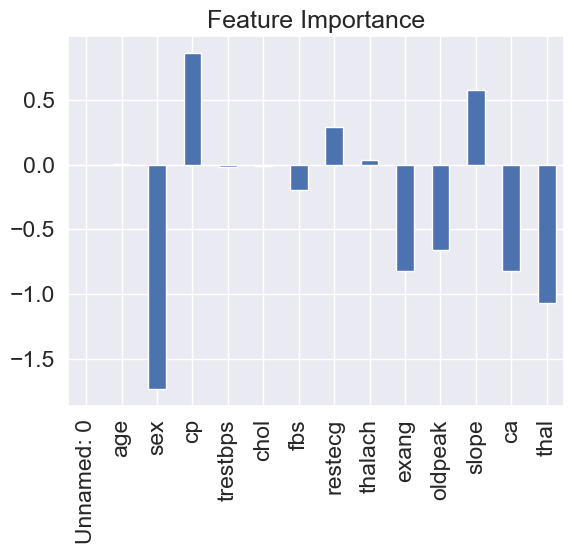

In [74]:
# visualize feature importance 
feature_df = pd.DataFrame(feature_dict,index = [0])
feature_df.T.plot.bar(title = "Feature Importance",legend = False);

In [76]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,86,226
1,413,300


In [77]:
413/83 

4.975903614457831

In [78]:
300/226

1.3274336283185841

In [79]:
# The ratio decreases for negative corelation 
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,46,28
1,324,158
2,129,340


## 6. Experimentation 
If you haven't hit your evaluation metric yet... ask yourself...
* Could you collect more data?
* Could you try a better model? CatBoost or XGBoost
* Could you improve the current models?(beyond what we've done so far)
*  If your model is good enough( you have hit your evaluation metric) how would you export it with others?
